In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
### Load Data
boston = load_boston()
print("Keys:", boston.keys())
print("Shape:", boston.data.shape)
print("Columns", boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Shape: (506, 13)
Columns ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# Create a data frame
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# The column that we want to predict.
y_column = bos['PRICE']

# The columns that we will be making predictions with.
x_columns = bos.drop('PRICE', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size = 0.33, random_state = 5)

In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

print("Intercept:", lm.intercept_)
print("Co-efficients:", lm.coef_)

mse = metrics.mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Intercept: 32.85893263408566
Co-efficients: [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]
Mean Squared Error: 28.541367275618384


In [15]:
df = pd.DataFrame({"features": x_columns.columns, "co-efficients": lm.coef_})

df

,co-efficients,features
0,-0.156381,CRIM
1,0.038549,ZN
2,-0.025063,INDUS
3,0.786440,CHAS
4,-12.946912,NOX
5,4.002689,RM
6,-0.011602,AGE
7,-1.368288,DIS
8,0.341757,RAD
9,-0.013515,TAX


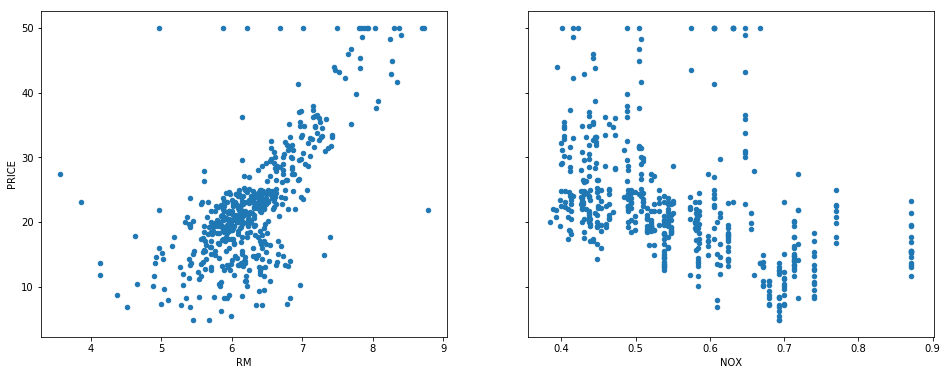

In [17]:
from matplotlib import pyplot as plt

# We see that RM, NOX have very strong correlations to price. 
#visualize the relationship between the features and the response using scatterplots

fig, axs = plt.subplots(1, 2, sharey=True)
bos.plot(kind='scatter', x='RM', y='PRICE', ax=axs[0], figsize=(16, 6))
bos.plot(kind='scatter', x='NOX', y='PRICE', ax=axs[1], figsize=(16, 6))

plt.show()

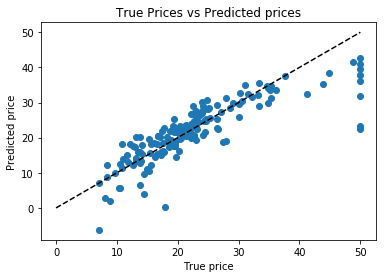

In [20]:
## PLOT true vs predicted prices and draw the line of fit

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.title("True Prices vs Predicted prices")
plt.show()

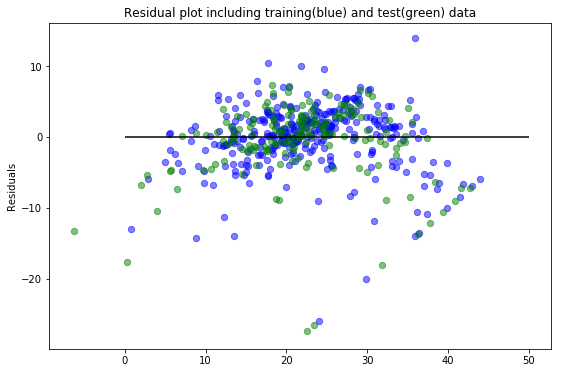

In [22]:
## Draw residual plot. If the data points are scattered randomly around the line, then our model is correct 
## and it's not missing the relationship between any two features.

plt.figure(figsize=(9,6))
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(x_test), lm.predict(x_test) - y_test, c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel('Residuals')
plt.title('Residual plot including training(blue) and test(green) data')
plt.show()

In [23]:
df_actual_pred = pd.DataFrame({"Actual": y_test.tolist(), "Predicted": y_pred.tolist()})

df_actual_pred

,Actual,Predicted
0,37.6,37.467236
1,27.9,31.391547
2,22.6,27.120196
3,13.8,6.468433
4,35.2,33.629667
5,10.4,5.670680
6,23.9,27.039467
7,29.0,29.927047
8,22.8,26.356613
9,23.2,22.452460
